# ワークショップ前の手順

*ワークショップの前に* 次の手順を実行してください。

## ステップ 1: デスクトップ環境に最新のCytoscape (3.9.0) をインストールします
- [ここから Cytoscape のインストーラをダウンロード](https://cytoscape.org/download.html)。
- Javaが無ければ合わせてインストールしてくれます。
- スタートメニューまたはデスクトップショートカットからCytoscape3.9.0を起動します

![image](https://user-images.githubusercontent.com/12192/139441980-5d73579f-39dd-45da-916b-759eff99474d.png)

- 上の画像のようなメッセージが表示されますので、OKボタンを押してCytoscapeを再起動してください。
- Cytoscape は立ち上げっぱなしにしておいてください。

## ステップ 2: Docker 環境の立ち上げと Google Chrome を用いたその環境へのアクセス
- `docker run -d -p 8888:8888 kozo2/cyautoworkshop` をあなたのPCで実行します。
- Google Chrome で `http://localhost:8888` を開きます。Safariでは動作しません。Firefoxは動作するかもしれませんが確認していません。

# ワークショップ (入門編)

## 自己紹介

西田 孝三

- Bioconductor Community Advisory Board (CAB) のメンバー
- RCy3 を用いた Bioconductor package (transomics2cytoscape) の作者
- Cytoscape のコミュニティへの貢献 (Google Summer of Code, Google Season of Docs)
- KEGGscape Cytoscape App の KEGGscape の作者

## Cytoscape とは何ですか?

![image](https://user-images.githubusercontent.com/12192/139426468-915e9a76-7e4e-4a37-aee9-3d0e344f551e.png)

- オープンソースの、クロスプラットフォームの、JavaデスクトップGUIアプリ。
- ネットワーク可視化のためのもの。

### コアコンセプト

**ネットワークとテーブル**: ネットワークのノードとエッジはアノテーションのテーブルを持っています。

![image](https://user-images.githubusercontent.com/12192/139427094-bfd9a839-dabf-468d-8f28-6458443c8e61.png)

![image](https://user-images.githubusercontent.com/12192/139427149-4f0fe568-3851-4de6-834e-2e809e85f1be.png)

色、形、サイズ、他何らか、といった「見栄え」をアノテーションの値によってスタイリングします。

## なぜ自動化する必要があるんですか?
GUIを直接使用できるのに、なぜCytoscapeを自動化するのですか？

- ループなど、複数回実行したいことのために
- 将来繰り返したいこと(再現)のために
- 同僚と共有したり公開したりしたいもののために
- RやPythonなどですでに取り組んでいるものを活かすために

端的には「再現性」「データ共有」「RかPythonの資源活用」のため。

## Cytoscape GUI操作はどのように自動化を実現しているのですか?

![image](https://user-images.githubusercontent.com/12192/139397677-80076550-e458-4bd4-9ab5-ba48ef6843b9.png)

- REST APIでそれを可能にしています。ほとんどすべてのGUI 操作がREST APIで行えるようになっています。
- 昨今のCytoscapeはデスクトップアプリケーションであるだけでなく、RESTサーバーでもあります。
- 以下のコマンドで、Cytoscapeがサーバーとして機能しているかどうかを確認できます。

  ```
  curl localhost:1234
  ```

- RCy3 または py4cytoscape といったパッケージはそのREST APIのラッパーです。
- py4cytoscape は RCy3 の Pythonクローンです。最近できました。py4cytoscape は RCy3 と同じ関数仕様を持っているため、片方使えると両方使えるようになったのと同じです。
- バイオインフォマティクスにはテーブル操作が不可欠であるため、RやPythonでCytoscapeを操作できると便利です。dplyrやpandasがあるからです。そういったテーブル操作をCytoscapeのGUIで行うのは面倒です。

[CyREST: Turbocharging Cytoscape Access for External Tools via a RESTful API. F1000Research 2015.](https://dx.doi.org/10.12688%2Ff1000research.6767.1)

[Cytoscape Automation: empowering workflow-based network analysis. Genome Biology 2019.](https://doi.org/10.1186/s13059-019-1758-4)

## RCy3を用いた自動化

![image](https://user-images.githubusercontent.com/12192/139400142-8a2a764b-dbbe-4e47-9d3c-d4cc07602468.png)

[RCy3: Network biology using Cytoscape from within R. F1000Research 2019.](https://f1000research.com/articles/8-1774)

## RCy3を使用してRのデータをCytoscapeネットワークに変換する

ネットワークは、生物学的データを表すための便利な方法を提供してくれます。
しかし、データをRからCytoscapeにシームレスに変換するにはどうすればよいでしょうか?

![image](https://user-images.githubusercontent.com/12192/139404069-536a67a2-e8fe-4072-bc42-74bfb060f924.png)

ここからいよいよハンズオンです。細かいことはおいておいてとにかくRとCytoscapeを接続しましょう。

以下のコードを実行する前に、ローカルのCytoscapeが完全に起動しきっていることを確認してください。
Cytoscapeが起動し、RESTサーバーが完全に起動するまでには少し時間がかかります。
(大体10秒くらい待ちます。)

In [1]:
library(RCy3)
browserClientJs <- getBrowserClientJs()
IRdisplay::display_javascript(browserClientJs)
cytoscapePing()

You are connected to Cytoscape!



### なぜ Jupyter が Cytoscape の REST サービスと通信できたのですか？

下記で何が起こったのかについての詳細な説明が必要ですね。

```
browserClientJs <- getBrowserClientJs()
IRdisplay::display_javascript(browserClientJs)
```

上記のコードでは、**Jupyter Bridge** と呼ばれるテクノロジーを使用しました。
Jupyter Bridgeは、リモートの REST クライアントからの HTTP リクエストをローカルリクエストのように見せかける JavaScript 実装です。

![image](https://user-images.githubusercontent.com/12192/139530994-8afd99b2-1175-46b3-9ad7-166d8ba78f2a.png)

デスクトップ環境内のCytoscapeにリモート環境からアクセスするのは難しいため、Jupyter Bridgeを使用します。

そしてこのワークショップが他のワークショップと違って [Orchestra](http://app.orchestra.cancerdatasci.org/) で動かなかったのは
この Jupyter Bridge のせいでもあります。

そのため私はローカルの Docker 環境内の Jupyter で Jupyter Bridge を使いました。
ローカルでなくても Orchestra でないリモートサーバーで私の Docker イメージを使うなら問題無く動作します。

### (で) なぜ Jupyter Bridge を使うのですか? ややこしくないですか? ノートブックを使わなければよいのではないですか?

- ユーザーは依存関係や環境について心配する必要が無いからです。
- ノートブックベースのワークフローとデータセットを簡単に共有できるからです。
- ワークフローはクラウドに常駐し、クラウドリソースにアクセスし、それでもCytoscape機能を使用できるところがよいのです。

### RデータをCytoscapeネットワークに変換する方法に戻りましょう...

いくつかの基本的なRオブジェクトからCytoscapeネットワークを作成します


In [2]:
nodes <- data.frame(id=c("node 0","node 1","node 2","node 3"),
    group=c("A","A","B","B"), # categorical strings
    score=as.integer(c(20,10,15,5)), # integers
    stringsAsFactors=FALSE)

In [3]:
nodes

id,group,score
<chr>,<chr>,<int>
node 0,A,20
node 1,A,10
node 2,B,15
node 3,B,5


In [4]:
edges <- data.frame(source=c("node 0","node 0","node 0","node 2"),
    target=c("node 1","node 2","node 3","node 3"),
    interaction=c("inhibits","interacts","activates","interacts"),  # optional
    weight=c(5.1,3.0,5.2,9.9), # numeric
    stringsAsFactors=FALSE)

In [5]:
edges

source,target,interaction,weight
<chr>,<chr>,<chr>,<dbl>
node 0,node 1,inhibits,5.1
node 0,node 2,interacts,3.0
node 0,node 3,activates,5.2
node 2,node 3,interacts,9.9


#### ネットワークの作成に使用されるデータフレーム

![image](https://user-images.githubusercontent.com/12192/139534280-0c569dfd-d66d-4054-9b58-becce79225bc.png)

#### さあ、RCy3からネットワークを作りましょう

In [6]:
createNetworkFromDataFrames(nodes, edges, title="my first network", collection="DataFrame Example")

Loading data...


Applying default style...


Applying preferred layout...




networkSUID 
        285

#### ネットワークの画像をエクスポートしましょう

大部分の人の目的はCytoscapeの画を論文のFigureに使うことでしょう。
ですので画像を取得する方法が知りたいでしょう。

In [7]:
exportImage("my_first_network", type = "png")

file 
"C:\\Users\\kozo2\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\my_first_network.png"

In [8]:
library(RCurl)
matrix <- getURL("https://raw.githubusercontent.com/cytoscape/cytoscape-tutorials/gh-pages/presentations/modules/RCy3_ExampleData/data/TCGA_OV_RNAseq_All_edgeR_scores.txt")
RNASeq_gene_scores <- read.table(text=matrix, header = TRUE, sep = "\t", quote="\"", stringsAsFactors = FALSE)

In [9]:
RNASeq_gene_scores

Name,geneid,logFC.mesen,logCPM.mesen,LR.mesen,PValue.mesen,FDR.mesen,logFC.diff,logCPM.diff,LR.diff,⋯,logFC.immuno,logCPM.immuno,LR.immuno,PValue.immuno,FDR.immuno,logFC.prolif,logCPM.prolif,LR.prolif,PValue.prolif,FDR.prolif
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1,-0.077320895,2.5827100,0.265542288,6.063378e-01,7.038775e-01,-0.242890159,2.5827100,2.490778e+00,⋯,0.39312991,2.5827100,7.67701142,5.592872e-03,0.017527558,-0.07291885,2.5827100,0.2536317,6.145294e-01,6.852028e-01
AADAT,51166,0.070121562,2.2266988,0.250469112,6.167450e-01,7.129096e-01,-0.586270386,2.2266988,1.559364e+01,⋯,-0.43841330,2.2266988,9.80546955,1.739936e-03,0.006603769,0.95456212,2.2266988,53.9597476,2.050000e-13,2.860000e-12
ACADVL,37,-0.081684942,7.3203376,0.928061773,3.353671e-01,4.493222e-01,0.002490680,7.3203376,8.467680e-04,⋯,0.12857053,7.3203376,2.50393576,1.135622e-01,0.199550404,-0.04937627,7.3203376,0.3652864,5.455849e-01,6.229750e-01
ATP6V1G2,534,-0.314748726,1.2661867,3.301836234,6.920248e-02,1.311622e-01,-0.357141995,1.2661867,4.100941e+00,⋯,0.20418411,1.2661867,1.57198027,2.099197e-01,0.322447272,0.46770661,1.2661867,8.5343521,3.485054e-03,7.837764e-03
POU2F3,25833,0.221858061,4.8887288,1.239245261,2.656166e-01,3.745420e-01,0.288698853,4.8887288,2.056991e+00,⋯,0.86807297,4.8887288,21.37327834,3.780000e-06,0.000033800,-1.37862988,4.8887288,42.3202960,7.750000e-11,7.470000e-10
POU5F1,5460,-0.727618829,1.7583399,11.139330420,8.451640e-04,3.591238e-03,0.322238215,1.7583399,2.420652e+00,⋯,0.66398983,1.7583399,11.56842358,6.708130e-04,0.002956941,-0.25860921,1.7583399,1.6079839,2.047754e-01,2.763034e-01
POU5F1B,5462,-0.421291192,0.4675505,6.815279599,9.038115e-03,2.494789e-02,-0.142569674,0.4675505,7.833023e-01,⋯,0.31208778,0.4675505,4.34101042,3.720484e-02,0.082213828,0.25177309,0.4675505,2.8296153,9.254053e-02,1.403656e-01
POU6F1,5463,0.082304656,2.8167736,0.625238935,4.291071e-01,5.427436e-01,-0.289833294,2.8167736,7.181229e+00,⋯,-0.04186972,2.8167736,0.16957791,6.804872e-01,0.773949259,0.24939836,2.8167736,6.2590453,1.235608e-02,2.402360e-02
POU6F2,11281,-0.269211034,0.4724774,0.502561744,4.783767e-01,5.879032e-01,-0.929613277,0.4724774,5.332995e+00,⋯,-0.19907201,0.4724774,0.29516453,5.869298e-01,0.697257048,1.39789632,0.4724774,16.9657456,3.810000e-05,1.329450e-04


In [10]:
top_mesenchymal_genes <- RNASeq_gene_scores[which(RNASeq_gene_scores$FDR.mesen < 0.05 & RNASeq_gene_scores$logFC.mesen > 2),]
head(top_mesenchymal_genes)

,Name,geneid,logFC.mesen,logCPM.mesen,LR.mesen,PValue.mesen,FDR.mesen,logFC.diff,logCPM.diff,LR.diff,⋯,logFC.immuno,logCPM.immuno,LR.immuno,PValue.immuno,FDR.immuno,logFC.prolif,logCPM.prolif,LR.prolif,PValue.prolif,FDR.prolif
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
188,PRG4,10216,2.705305,2.6139056,95.58179,1.42e-22,7.34e-21,-1.2716521,2.6139056,14.107056,⋯,-0.4980017,2.6139056,2.651951,0.103422901,0.185548905,-0.9356510,2.6139056,8.9562066,0.0027652850,0.006372597
252,PROK1,84432,2.543381,1.3255202,68.31067,1.40e-16,4.77e-15,0.7455119,1.3255202,5.105528,⋯,-1.9692994,1.3255202,27.876348,0.000000129,0.000001650,-1.3195933,1.3255202,13.7675841,0.0002068750,0.000622057
308,PRRX1,5396,2.077538,4.8570983,123.09925,1.33e-28,1.08e-26,-1.2367108,4.8570983,29.949104,⋯,-0.4914091,4.8570983,5.773502,0.016269586,0.042062023,-0.3494185,4.8570983,2.9943819,0.0835537930,0.128528698
434,PTGFR,5737,2.075707,-0.1960881,73.24646,1.14e-17,4.30e-16,-0.4233297,-0.1960881,2.318523,⋯,-0.6737143,-0.1960881,6.289647,0.012144523,0.033197211,-0.9786631,-0.1960881,12.9112727,0.0003266090,0.000932503
438,PTGIS,5740,2.094198,5.8279714,165.11038,8.65e-38,1.20e-35,-0.4448761,5.8279714,5.696086,⋯,-0.6138074,5.8279714,11.708780,0.000622059,0.002779895,-1.0355143,5.8279714,31.9162051,0.0000000161,0.000000107
1214,BARX1,56033,3.267472,1.7427387,166.30064,4.76e-38,6.82e-36,-2.4411370,1.7427387,52.224346,⋯,-0.6063633,1.7427387,4.577141,0.032401228,0.073565295,-0.2199714,1.7427387,0.6315171,0.4267993850,0.510856262


## ユースケース-私の上位の遺伝子はどのように関連していますか？

相互作用データを格納しているデータベースは無限にあります。

![image](https://user-images.githubusercontent.com/12192/139541346-9e223e88-e6df-4e4d-b7f2-a5836f6e97eb.png)

STRINGデータベースにクエリを実行して、トップのMesenchymalの遺伝子のセットに対して見つかったすべての相互作用を取得します。

### ネットワークデータを使用した Cytoscape Apps

ありがたいことに、遺伝子それぞれを個別にクエリする必要はありません。

多くの特殊な（たとえば、特定の分子、相互作用の種類、または種の）相互作用データベースに加えて、これらのデータベースを照合して、より使いやすい幅広いリソースを作成するデータベースもあります。例えば：

- [stringApp](https://apps.cytoscape.org/apps/stringapp) - は [STRING(Szklarczyk et al.)](https://doi.org/10.1093/nar/gkaa1074) から protein-protein そして protein-chemical  にクエリをかけてそれをネットワークとしてCytoscapeにインポートしてくれます。

この "App" のインストールもRで自動的に行えます。


In [11]:
installApp("stringApp")

App stringApp installedFinished



In [12]:
getAppStatus("stringApp")

[1] "app: stringApp, status: Installed" "Finished"

### 特定のCytoscapeコマンドのヘルプ
Rの環境から個々のコマンドに関する情報を取得するには、commandsHelp関数を使用することでできます。
コマンドに名前を追加して、情報を取得するコマンドを指定するだけです。
たとえば “commandsHelp("help string”)“ といったふうにです。


In [13]:
commandsHelp("help")

[1] "analyzer"         "annotation"       "apps"             "command"         
 [5] "cybrowser"        "cychart"          "diffusion"        "edge"            
 [9] "enhancedGraphics" "filetransfer"     "filter"           "group"           
[13] "idmapper"         "layout"           "network"          "node"            
[17] "session"          "string"           "table"            "view"            
[21] "vizmap"

In [14]:
commandsHelp("help string")

[1] "add nodes"             "change confidence"     "change type"          
 [4] "compound query"        "disease query"         "enable glass"         
 [7] "expand"                "filter enrichment"     "hide charts"          
[10] "list species"          "make string"           "protein query"        
[13] "pubmed query"          "retrieve enrichment"   "retrieve publications"
[16] "settings"              "show charts"           "show enrichment"      
[19] "show images"           "show labels"           "show publications"    
[22] "stringify"             "version"

In [15]:
commandsHelp("help string protein query")

[1] "cutoff"          "includesViruses" "limit"           "networkType"    
[5] "newNetName"      "query"           "species"         "taxonID"

In [16]:
mesen_string_interaction_cmd <- paste('string protein query taxonID=9606 limit=150 cutoff=0.9 query="',paste(top_mesenchymal_genes$Name, collapse=","),'"',sep="")
commandsGET(mesen_string_interaction_cmd)

[1] "Loaded network 'STRING network' with 262 nodes and 2140 edges"
[2] "Finished"

- cutoff: 信頼スコアは、この相互作用が存在するという累積された証拠を反映しています。このカットオフよりも大きいスコアのインタラクションのみが返されます。
- limit: クエリセットに加えて返されるタンパク質の最大数。
- query: タンパク質名または識別子のコンマ区切りリスト。
- taxonID: 種の分類ID。 IDについては、NCBI分類のホームページを参照してください。種とtaxonIDの両方が異なる種に設定されている場合、taxonIDが優先されます。

詳細については、Cytoscapeメニューバーの "Help -> Automation -> CyREST Commands API" を参照してください。


In [17]:
exportImage("initial_string_network", type = "png")

file 
"C:\\Users\\kozo2\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\initial_string_network.png"

![initial_string_network](https://user-images.githubusercontent.com/12192/139543384-b19ac0f3-1dc9-4e6d-a212-af4f19ab6529.png)

### レイアウト
ネットワークをレイアウトするのも自動的に行えます。


In [18]:
layoutNetwork('force-directed')

試してみることができる他のレイアウトアルゴリズムを確認してください。

In [19]:
getLayoutNames()

[1] "attribute-circle"      "stacked-node-layout"   "attribute-grid"       
 [4] "degree-circle"         "circular"              "attributes-layout"    
 [7] "kamada-kawai"          "force-directed"        "cose"                 
[10] "grid"                  "hierarchical"          "fruchterman-rheingold"
[13] "isom"                  "force-directed-cl"

### レイアウト-続き

特定のレイアウトのパラメーターを取得する。

In [20]:
getLayoutPropertyNames(layout.name='force-directed')

[1] "defaultEdgeWeight"        "defaultNodeMass"         
 [3] "defaultSpringCoefficient" "defaultSpringLength"     
 [5] "edgeAttribute"            "isDeterministic"         
 [7] "maxWeightCutoff"          "minWeightCutoff"         
 [9] "network"                  "nodeAttribute"           
[11] "nodeList"                 "numIterations"           
[13] "singlePartition"          "type"

force directed レイアウトを使用してネットワークを再レイアウトしますが、今度はいくつかのパラメーターを指定してみましょう。
このような「パラメーターを変えてまた試す」といった際に「自動化」は大いに役立つことがお分かりになるでしょう。

In [21]:
layoutNetwork('force-directed defaultSpringCoefficient=0.0000008 defaultSpringLength=70')

再レイアウトされたネットワークのスクリーンショットを取得する。

In [22]:
response <- exportImage("relayout_string_network", type = "png")

In [23]:
response

file 
"C:\\Users\\kozo2\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\relayout_string_network.png"

新しいレイアウトのSTRINGのネットワーク

![relayout_string_network](https://user-images.githubusercontent.com/12192/139554068-55353d6a-62e2-4956-b2c6-cda4cc5a28d8.png)

## STRINGネットワークに発現解析データをオーバーレイします

これを行うには、RCy3のloadTableData関数を使用します。
IDの種類が一致していることを確認することが重要です。
ノード属性テーブルの列名を取得することで、STRINGが何を使用しているかを確認できます。

In [24]:
getTableColumnNames('node')

[1] "SUID"                                "shared name"                        
 [3] "name"                                "selected"                           
 [5] "stringdb::canonical name"            "display name"                       
 [7] "stringdb::full name"                 "stringdb::database identifier"      
 [9] "stringdb::description"               "@id"                                
[11] "stringdb::namespace"                 "stringdb::node type"                
[13] "query term"                          "stringdb::sequence"                 
[15] "stringdb::species"                   "stringdb::STRING style"             
[17] "stringdb::enhancedLabel Passthrough" "compartment::cytoskeleton"          
[19] "compartment::cytosol"                "compartment::endoplasmic reticulum" 
[21] "compartment::endosome"               "compartment::extracellular"         
[23] "compartment::golgi apparatus"        "compartment::lysosome"              
[25] "compartment::mitochondrion"          "compartment::nucleus"               
[27] "compartment::peroxisome"             "compartment::plasma membrane"       
[29] "stringdb::interactor score"          "stringdb::structures"               
[31] "target::development level"           "target::family"                     
[33] "tissue::adrenal gland"               "tissue::blood"                      
[35] "tissue::bone"                        "tissue::bone marrow"                
[37] "tissue::eye"                         "tissue::gall bladder"               
[39] "tissue::heart"                       "tissue::intestine"                  
[41] "tissue::kidney"                      "tissue::liver"                      
[43] "tissue::lung"                        "tissue::muscle"                     
[45] "tissue::nervous system"              "tissue::pancreas"                   
[47] "tissue::saliva"                      "tissue::skin"                       
[49] "tissue::spleen"                      "tissue::stomach"                    
[51] "tissue::thyroid gland"               "tissue::urine"

## STRINGネットワークに発現解析データをオーバーレイします-続き

各列が何であるかわからず、使用する列をさらに確認したい場合は、ノード属性テーブル全体をプルすることもできます。

In [25]:
node_attribute_table_topmesen <- getTableColumns(table="node")
head(node_attribute_table_topmesen[,3:7])

,name,selected,stringdb::canonical name,display name,stringdb::full name
,<chr>,<lgl>,<chr>,<chr>,<chr>
1024,9606.ENSP00000295992,FALSE,Q9UKZ9,PCOLCE2,NA
1027,9606.ENSP00000361818,FALSE,P31431,SDC4,NA
1030,9606.ENSP00000363827,FALSE,P98160,HSPG2,NA
1033,9606.ENSP00000351807,FALSE,Q6ZWJ6,ELN,NA
1036,9606.ENSP00000284987,FALSE,Q9UNA0,ADAMTS5,NA
1039,9606.ENSP00000263253,FALSE,Q09472,EP300,NA


![image](https://user-images.githubusercontent.com/12192/139554236-dc19aaf7-8186-40f0-9ed3-d50a46c64d27.png)

“display name” の列には、Ovarian Cancerデータセットにも含まれている HGNC 遺伝子名が含まれています。

発現データをインポートするには、そのデータセットを “display name” ノード属性に一致させます。

In [26]:
loadTableData(RNASeq_gene_scores, table.key.column = "display name", data.key.column = "Name")  #default data.frame key is row.names

[1] "Success: Data loaded in defaultnode table"

## ビジュアルスタイル

ビジュアルスタイルを変更する独自の視覚スタイルを作成して、STRINGネットワーク上の発現データを可視化してみましょう。
まずはデフォルトのスタイルから始めます。

**フォーマットされたSTRINGネットワーク**

![mesen_string_network](https://user-images.githubusercontent.com/12192/139555494-3d46d339-153d-4c93-bf06-c393375ba2be.png)

In [27]:
style.name = "MesenchymalStyle"
defaults.list <- list(NODE_SHAPE="ellipse",
                 NODE_SIZE=60,
                 NODE_FILL_COLOR="#AAAAAA",
                 EDGE_TRANSPARENCY=120)
# p for passthrough; nothing else needed
node.label.map <- mapVisualProperty('node label','display name','p') 
createVisualStyle(style.name, defaults.list, list(node.label.map))
setVisualStyle(style.name=style.name)

message 
"Visual Style applied."

### ビジュアルスタイル-続き
MesenchymalのlogFCの発現に対するマッピングを使用して、作成したスタイルを更新します。
最初のステップは、Cytoscapeから列データを取得し（上記のnode_attributeテーブルの概念を再利用できますが、式データを追加したので、関数を再度呼び出す必要があります）、最小値と最大値を引き出して値の範囲に対するデータマッピングを定義します。 

注：データセット全体、または現在Cytoscapeで表されているサブセットのみに基づいて最小値と最大値を定義できます。2つの方法では、異なる結果が得られます。 同じデータセットで作成された異なるネットワークを比較する場合は、サブセットではなく、データセット全体から最小値と最大値を計算するのが最善です。


In [28]:
min.mesen.logfc = min(RNASeq_gene_scores$logFC.mesen,na.rm=TRUE)
max.mesen.logfc = max(RNASeq_gene_scores$logFC.mesen,na.rm=TRUE)
data.values = c(min.mesen.logfc,0,max.mesen.logfc)

### ビジュアルスタイル-続き
次に、RColorBrewer パッケージを使用して、データ値と組み合わせるのに適した色を選択します。

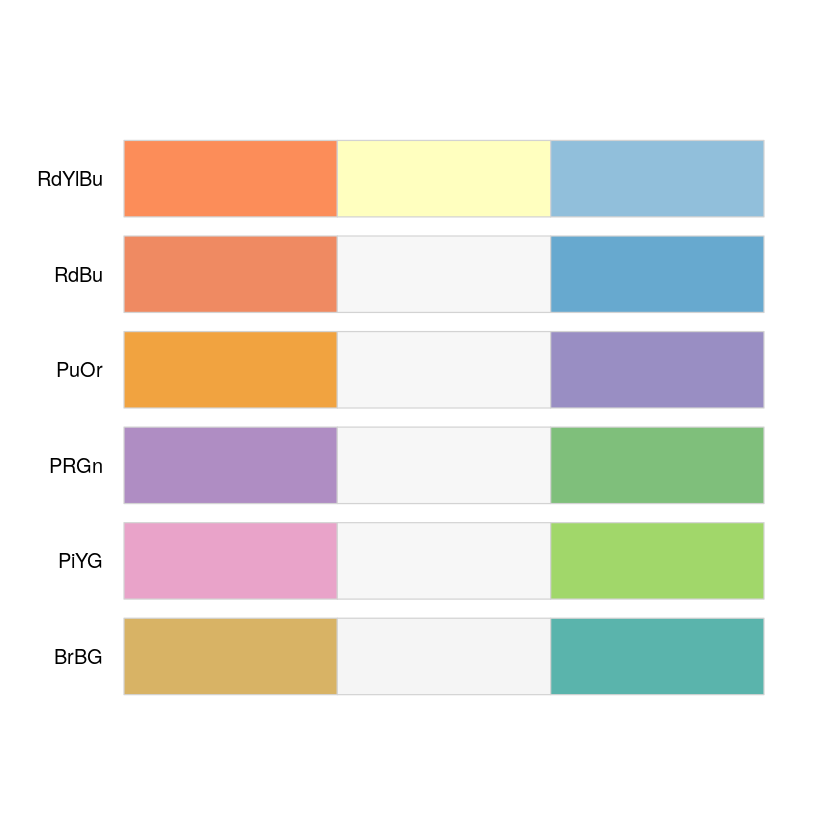

In [29]:
library(RColorBrewer)
display.brewer.all(length(data.values), colorblindFriendly=TRUE, type="div") 

### ノードの色を logFC に。

In [30]:
node.colors <- c(rev(brewer.pal(length(data.values), "RdBu")))

色をデータ値にマッピングし、ビジュアルスタイルを更新します。

In [31]:
setNodeColorMapping("logFC.mesen", data.values, node.colors, style.name=style.name)

$status
[1] 201

$reason
[1] "Created"

$text
[1] ""

### ビジュアルスタイル-続き
STRINGには、クエリタンパク質と、クエリタンパク質に関連する他のタンパク質（最初に最も強い接続を含む）が含まれることを忘れないでください。
このネットワークのすべてのタンパク質があなたのトップヒットであるわけではありません。どのタンパク質がトップMesenchymalヒットであるかをどのように可視化できますか？

別の(境界線の)色を追加するか、トップヒットのノードの形状を変更してみましょう。

In [32]:
getNodeShapes()

#select the Nodes of interest
#selectNode(nodes = top_mesenchymal_genes$Name, by.col="display name")
setNodeShapeBypass(node.names = top_mesenchymal_genes$Name, new.shapes = "TRIANGLE")

[1] "HEXAGON"         "OCTAGON"         "PARALLELOGRAM"   "TRIANGLE"       
[5] "ELLIPSE"         "RECTANGLE"       "ROUND_RECTANGLE" "VEE"            
[9] "DIAMOND"

### ビジュアルスタイル-続き
最後に Mesenchymal の p-value と相関するノードのサイズを変更しましょう。


In [33]:
setNodeSizeMapping(table.column = 'LR.mesen', 
                   table.column.values = c(min(RNASeq_gene_scores$LR.mesen), 
                                           mean(RNASeq_gene_scores$LR.mesen), 
                                           max(RNASeq_gene_scores$LR.mesen)), 
                   sizes = c(30, 60, 150), mapping.type = "c", style.name = style.name)

$status
[1] 201

$reason
[1] "Created"

$text
[1] ""

In [34]:
response <- exportImage("mesen_string_network", type = "png")

In [35]:
response

file 
"C:\\Users\\kozo2\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\mesen_string_network.png"

# ありがとうございました!
これで基本的なしくみだけでなく論文のような図を作る実践的な方法も学習できましたね。

役立つと思われる追加のリソースは次のとおりです:

- manual.cytoscape.org
- tutorials.cytoscape.org
- automation.cytoscape.org
- apps.cytoscape.org
- cytoscape-publications.tumblr.com
- [cytoscape help page](https://cytoscape.org/documentation_users.html)
- [cytoscape developer page](https://cytoscape.org/documentation_developers.html)
- [nrnb.org/training.html](http://nrnb.org/training.html)